In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import torch
import os 

print("Libraries loaded sucessfully")



Libraries loaded sucessfully


In [7]:
def create_moving_circle_video(num_frames=50, img_size=32, circle_radius=3):
    """
    Generate a video of single cirle moving with physics.

    Args:
        num_frames: Number of frames to generate
        img_size: size of the square image(img_size x img_size)
        circle_radius: radius of the circle in pixels

    Returns:
        frames: numpy array of shape (num_frames, img_size, img_size)
        positions: list of (x, y) positions for each frame 

    """
    frames = []
    positions = []

    x = np.random.uniform(circle_radius + 5, img_size - circle_radius - 5)
    y = np.random.uniform(circle_radius + 5, img_size - circle_radius - 5)

    vx = np.random.uniform(-1.5, 1.5)
    vy = np.random.uniform(-1.5, 1.5)

    for i in range(num_frames):
        frame = np.zeros((img_size, img_size))

        Y, X = np.ogrid[:img_size, :img_size]
        dist_from_center = np.sqrt((X - x)**2 + (Y-y)**2)
        circle_mask = dist_from_center <= circle_radius 
        frame[circle_mask] = 1.0

        frames.append(frame)
        positions.append((x, y))

        x += vx
        y += vy

        if x - circle_radius <= 0 or x + circle_radius >= img_size:
            vx = -vx
            x = np.clip(x, circle_radius, img_size - circle_radius)
        if y - circle_radius <= 0 or y + circle_radius >= img_size:
            vy = -vy
            y = np.clip(y, circle_radius, img_size - circle_radius)

    return np.array(frames), positions

print("Generating test video...")
test_video, test_positions = create_moving_circle_video(num_frames=50)
print(f"✓ Video shape: {test_video.shape}")
print(f"✓ Generated {len(test_positions)} frames")
print(f"✓ First position: {test_positions[0]}")
print(f"✓ Last position: {test_positions[-1]}")
        

        

Generating test video...
✓ Video shape: (50, 32, 32)
✓ Generated 50 frames
✓ First position: (10.452366098615709, 18.028113616246053)
✓ Last position: (np.float64(23.726363452532432), np.float64(19.43149426995744))


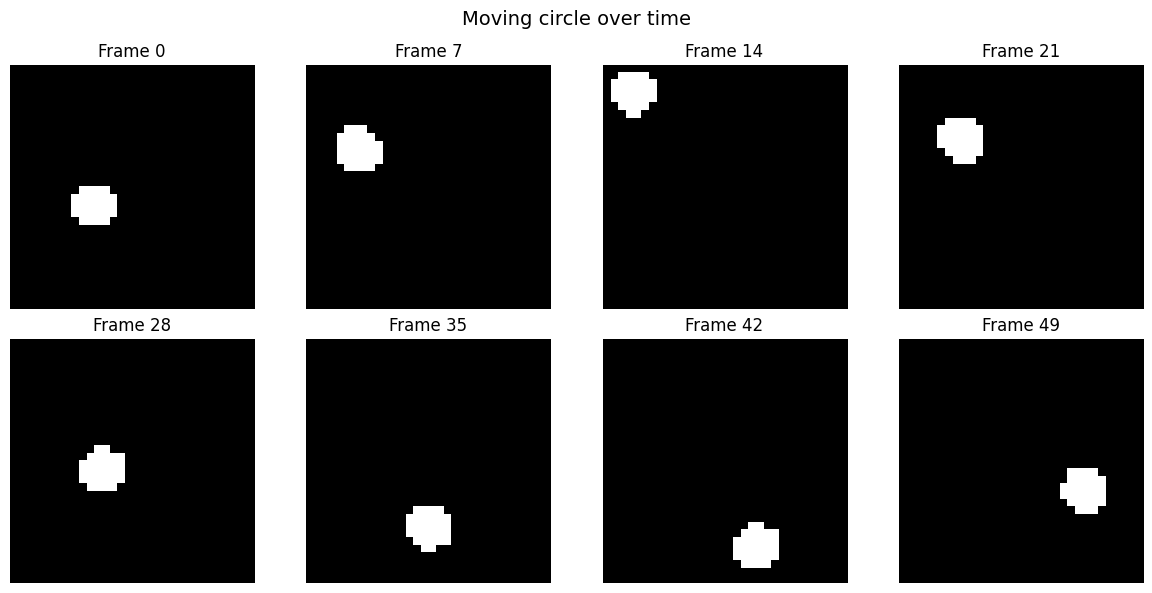

You should see the circle moving across frames!


In [8]:
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
frame_indices = [0, 7, 14, 21 , 28, 35, 42, 49]

for idx, frame_num in enumerate(frame_indices):
    row = idx // 4
    col = idx % 4 
    axes[row, col].imshow(test_video[frame_num], cmap='grey')
    axes[row, col].set_title(f'Frame {frame_num}')
    axes[row, col].axis('off')

plt.suptitle('Moving circle over time', fontsize=14)
plt.tight_layout()
plt.show()

print("You should see the circle moving across frames!")
